# Week 2
## Linear Regression: Comparison (this is no exercise)

This Jupyter Notebook aims to provide a comparison between a custom linear regression model implementation and scikit-learn's `LinearRegression` model. The purpose is to evaluate the differences in the performance and characteristics of both approaches.

We will:
1. Load the dataset containing gas price information and its features.
2. Prepare the dataset by converting categorical features to numerical values.
3. Train-test split the dataset to create training and testing data.
4. Train a linear regression model using scikit-learn.
5. Make predictions using the trained model.
6. Evaluate the performance by calculating residuals, average residuals, and Root Mean Squared Error (RMSE).
7. Compare the results of this model with my custom implementation of the normal equation-based linear regression model.

By comparing the RMSE and residuals from both models, we can observe differences in overfitting behavior, numerical stability, and overall performance.

[-5.08688132e-03  1.69774713e-02  8.23392024e-07  1.10368426e-02
 -1.10368426e-02 -1.35789983e-02  1.35789983e-02  1.58182791e-02
 -1.58182791e-02 -1.69783700e-02  1.69783700e-02 -7.22878444e-03
  7.22878444e-03  1.51905251e-03 -1.51905251e-03  1.06494450e-02
 -1.06494450e-02  2.56509969e-02  1.02721960e-02 -3.14621316e-02
 -4.46106124e-03]


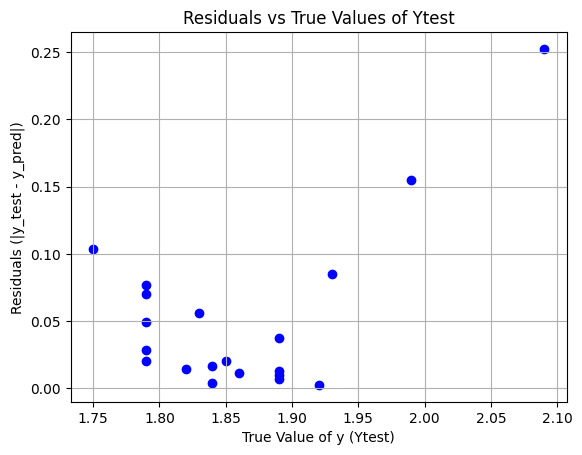

Average Residual: 0.05173830473924346
RMSE: 0.0794033127804724


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt

FEATURES = ['Pumps', 'Interior', 'Restaurant', 'CarWash', 'Highway', 'Intersection', 'Stoplight', 'Gasolines',
            'Competitors', 'Income', 'Brand']
df = pd.read_csv('GasPrices.csv')

X = df[FEATURES]
y = df['Price']

Xdata = pd.get_dummies(X).astype(np.float64)

# Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xdata, y, test_size=0.2, random_state=42)
Xtrain = Xdata.sample(frac=0.8, axis=0, random_state=420)
Xtest = Xdata.drop(Xtrain.index)

Ytrain = y.loc[Xtrain.index]
Ytest = y.loc[Xtest.index]

# Train the Linear Regression model using scikit-learn
model = LinearRegression()
model.fit(Xtrain, Ytrain)

print(model.coef_)

Ypred = model.predict(Xtest)

residuals = np.abs(Ytest.to_numpy() - Ypred)

plt.scatter(Ytest, residuals, color='blue')
plt.xlabel('True Value of y (Ytest)')
plt.ylabel('Residuals (|y_test - y_pred|)')
plt.title('Residuals vs True Values of Ytest')
plt.grid(True)
plt.show()

average_residual = residuals.mean()
print(f'Average Residual: {average_residual}')

rmse = root_mean_squared_error(Ytest, Ypred)
print(f'RMSE: {rmse}')
